In [1]:
# Import necessary modules
import numpy as np
import matplotlib.pyplot as plt
import sys
import scipy as sc
import scipy.stats as stats
from tqdm import tqdm
import pickle
import os.path as op
import os
import re
import networkx as nx
from networkx.algorithms import community
import matplotlib as mpl
from scipy.integrate import simps
from scipy.interpolate import interp1d
from scipy.signal import find_peaks

In [89]:
# Subject 330 is for visualization
clinical_ids = np.load('clinical_ids.npy')

order_KL_330 = np.empty((86, 30, 30))
PLV_KL_330 = np.empty((86, 30, 30))
DFA_KL_330 = np.empty((86, 30, 30))
sd_KL_330 = np.empty((86, 30, 30))
for i, n in enumerate(clinical_ids):
    for k in range(1, 31):
        for l in range(1, 31):
            DFA_KL_330[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/exp_allsubs/sub-330/sub-330_K-{k}_L-{l}_dfa.npy"))
            PLV_KL_330[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/exp_allsubs/sub-330/sub-330_K-{k}_L-{l}_plv.npy"))
            order_KL_330[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/exp_allsubs/sub-330/sub-330_K-{k}_L-{l}_order.npy"))
            sd_KL_330[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/exp_allsubs/sub-330/sub-330_K-{k}_L-{l}_std.npy"))

In [90]:
sd_order_KL_330 = np.empty((86, 30, 30))
sd_PLV_KL_330 = np.empty((86, 30, 30))
sd_DFA_KL_330 = np.empty((86, 30, 30))
sd_sd_KL_330 = np.empty((86, 30, 30))
for i, n in enumerate(clinical_ids):
    for k in range(1, 31):
        for l in range(1, 31):
            sd_DFA_KL_330[i, k-1, l-1] = np.std(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/exp_allsubs/sub-330/sub-330_K-{k}_L-{l}_dfa.npy"))
            sd_PLV_KL_330[i, k-1, l-1] = np.std(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/exp_allsubs/sub-330/sub-330_K-{k}_L-{l}_plv.npy"))
            sd_order_KL_330[i, k-1, l-1] = np.std(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/exp_allsubs/sub-330/sub-330_K-{k}_L-{l}_order.npy"))
            sd_sd_KL_330[i, k-1, l-1] = np.std(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/exp_allsubs/sub-330/sub-330_K-{k}_L-{l}_std.npy"))

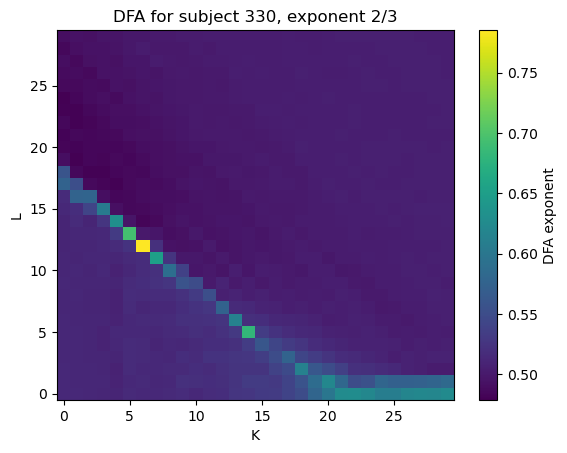

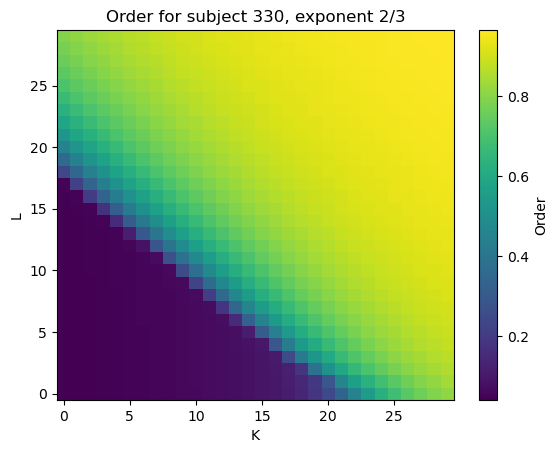

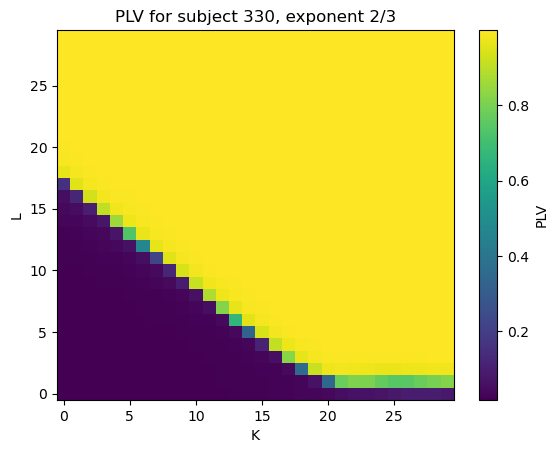

In [91]:
plt.figure()
im = plt.imshow(DFA_KL_330[1].T, origin='lower', aspect='auto')
plt.xlabel("K")
plt.ylabel("L")
plt.title("DFA for subject 330, exponent 2/3")
plt.colorbar(im, label = 'DFA exponent')
plt.show()

im = plt.imshow(np.mean(order_KL_330, axis=0).T, origin='lower', aspect='auto')
plt.xlabel("K")
plt.ylabel("L")
plt.title("Order for subject 330, exponent 2/3")
plt.colorbar(im, label = 'Order')
plt.show()

im = plt.imshow(PLV_KL_330[1].T, origin='lower', aspect='auto')
plt.xlabel("K")
plt.ylabel("L")
plt.title("PLV for subject 330, exponent 2/3")
plt.colorbar(im, label = 'PLV')
plt.show()

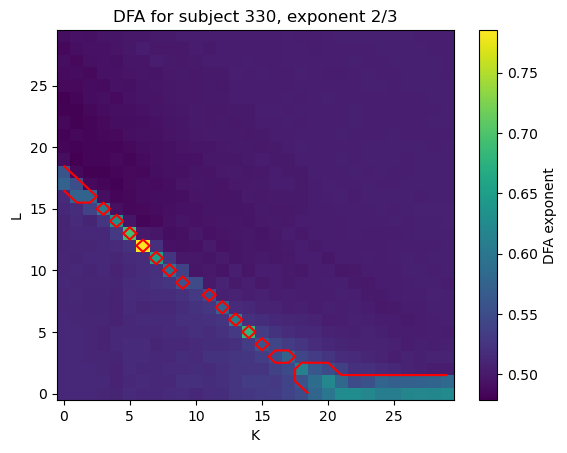

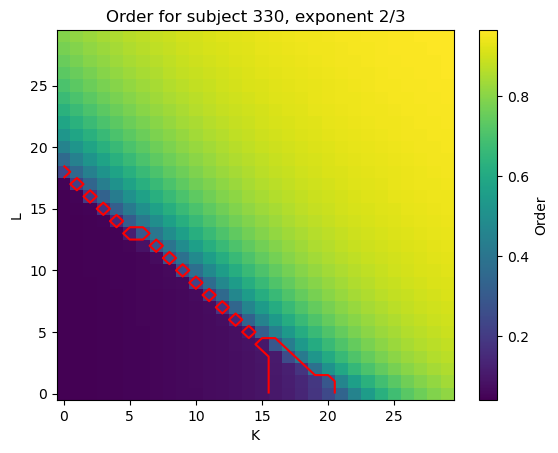

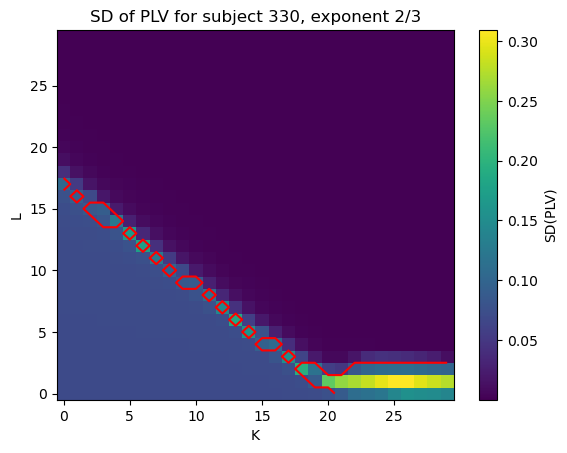

In [92]:
# GP-widths
threshold = 0.55
plt.figure()
im = plt.imshow(DFA_KL_330[1].T, origin='lower', aspect='auto')
contours = DFA_KL_330[1].T >= threshold
plt.contour(contours, levels=[0.5], colors='red', linewidths=1.5)
plt.xlabel("K")
plt.ylabel("L")
plt.title("DFA for subject 330, exponent 2/3")
plt.colorbar(im, label = 'DFA exponent')
plt.show()

threshold_min = 0.1
threshold_max = 0.3
im = plt.imshow(np.mean(order_KL_330, axis=0).T, origin='lower', aspect='auto')
contours = (np.mean(order_KL_330, axis=0).T >= threshold_min) & (np.mean(order_KL_330, axis=0).T <= threshold_max)
plt.contour(contours, levels=[0.5], colors='red', linewidths=1.5)
plt.xlabel("K")
plt.ylabel("L")
plt.title("Order for subject 330, exponent 2/3")
plt.colorbar(im, label = 'Order')
plt.show()

threshold = 0.08
im = plt.imshow(sd_PLV_KL_330[1].T, origin='lower', aspect='auto')
contours = sd_PLV_KL_330[1].T >= threshold
plt.contour(contours, levels=[0.5], colors='red', linewidths=1.5)
plt.xlabel("K")
plt.ylabel("L")
plt.title("SD of PLV for subject 330, exponent 2/3")
plt.colorbar(im, label = 'SD(PLV)')
plt.show()

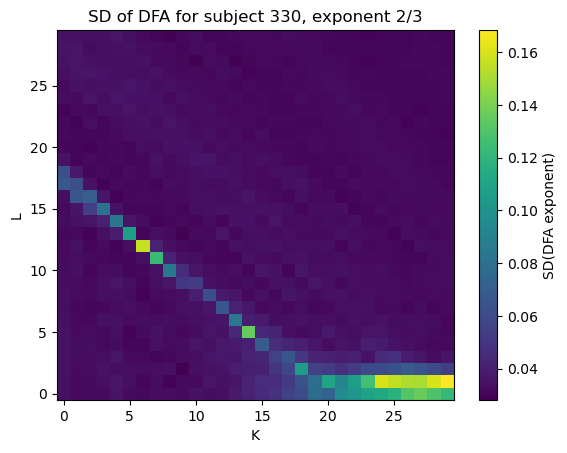

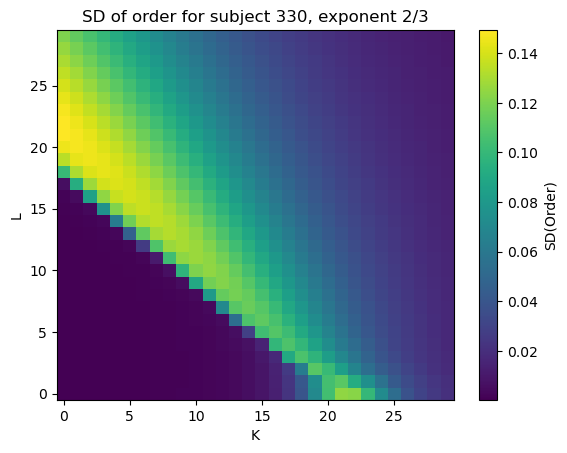

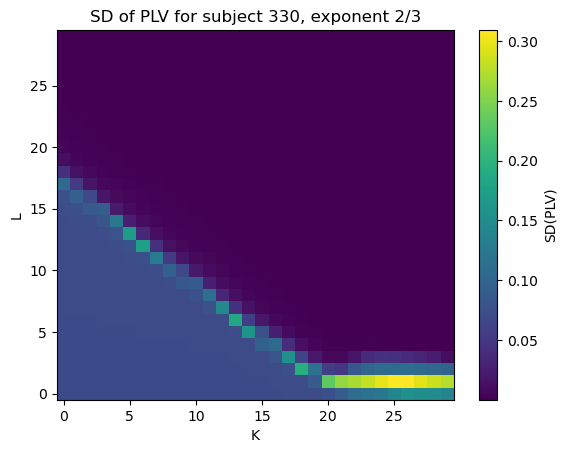

In [93]:
plt.figure()
im = plt.imshow(sd_DFA_KL_330[1].T, origin='lower', aspect='auto')
plt.xlabel("K")
plt.ylabel("L")
plt.title("SD of DFA for subject 330, exponent 2/3")
plt.colorbar(im, label = 'SD(DFA exponent)')
plt.show()

im = plt.imshow(np.mean(sd_order_KL_330, axis=0).T, origin='lower', aspect='auto')
plt.xlabel("K")
plt.ylabel("L")
plt.title("SD of order for subject 330, exponent 2/3")
plt.colorbar(im, label = 'SD(Order)')
plt.show()

im = plt.imshow(sd_PLV_KL_330[1].T, origin='lower', aspect='auto')
plt.xlabel("K")
plt.ylabel("L")
plt.title("SD of PLV for subject 330, exponent 2/3")
plt.colorbar(im, label = 'SD(PLV)')
plt.show()

In [94]:
# Print interesting stuff from KL-sweep
print(f'The most critical point in DFA for subject 330 - {np.unravel_index(DFA_KL_330[1].argmax(), DFA_KL_330[1].shape)}')
print(f'The value of the most critical point - {np.amax(DFA_KL_330[1])}')
critical_ridge330 = np.argwhere(DFA_KL_330[1]>0.57)
print(f'Number of KL-pairs in critical ridge in DFA - {critical_ridge330.shape[0]}')
flattened330 = np.ndarray.flatten(DFA_KL_330[1])
sorted330 = np.sort(flattened330[::-1])
top_5_exponents330 = sorted330[-45:]
mean_top_5_330 = np.mean(top_5_exponents330)
print(f'Mean DFA scaling exponent of the top 5 percent of exponents - {mean_top_5_330}')

The most critical point in DFA for subject 330 - (6, 12)
The value of the most critical point - 0.7851999851596496
Number of KL-pairs in critical ridge in DFA - 34
Mean DFA scaling exponent of the top 5 percent of exponents - 0.5968495456326176


In [96]:
clinical_ids = np.load('clinical_ids.npy')
k1 = np.linspace(8,14,13)
k2 = np.linspace(1,7.5,5)
k3 = np.linspace(14.5,25,5)
k_values = np.concatenate((k1,k2,k3))
k_values = np.sort(k_values)

DFA_KL_330_exp = np.empty(23)
order_KL_330_exp = np.empty(23)
PLV_KL_330_exp = np.empty(23)
sd_KL_330_exp = np.empty(23)

DFA_KL_330_exp_sd = np.empty(23)
order_KL_330_exp_sd = np.empty(23)
PLV_KL_330_exp_sd = np.empty(23)
sd_KL_330_exp_sd = np.empty(23)

for k_ind, k in enumerate(k_values):
    DFA_KL_330_exp[k_ind] = np.mean(np.load(f'/m/nbe/scratch/leap_mcpsych/Aleksi/exp_l10_allsubs/sub-330/sub-330_K-{k}_L-10_dfa.npy'))
    order_KL_330_exp[k_ind] = np.mean(np.load(f'/m/nbe/scratch/leap_mcpsych/Aleksi/exp_l10_allsubs/sub-330/sub-330_K-{k}_L-10_order.npy'))
    PLV_KL_330_exp[k_ind] = np.mean(np.load(f'/m/nbe/scratch/leap_mcpsych/Aleksi/exp_l10_allsubs/sub-330/sub-330_K-{k}_L-10_plv.npy'))
    sd_KL_330_exp[k_ind] = np.mean(np.load(f'/m/nbe/scratch/leap_mcpsych/Aleksi/exp_l10_allsubs/sub-330/sub-330_K-{k}_L-10_std.npy'))

for k_ind, k in enumerate(k_values):
    DFA_KL_330_exp_sd[k_ind] = np.std(np.load(f'/m/nbe/scratch/leap_mcpsych/Aleksi/exp_l10_allsubs/sub-330/sub-330_K-{k}_L-10_dfa.npy'))
    order_KL_330_exp_sd[k_ind] = np.std(np.load(f'/m/nbe/scratch/leap_mcpsych/Aleksi/exp_l10_allsubs/sub-330/sub-330_K-{k}_L-10_order.npy'))
    PLV_KL_330_exp_sd[k_ind] = np.std(np.load(f'/m/nbe/scratch/leap_mcpsych/Aleksi/exp_l10_allsubs/sub-330/sub-330_K-{k}_L-10_plv.npy'))
    sd_KL_330_exp_sd[k_ind] = np.std(np.load(f'/m/nbe/scratch/leap_mcpsych/Aleksi/exp_l10_allsubs/sub-330/sub-330_K-{k}_L-10_std.npy'))

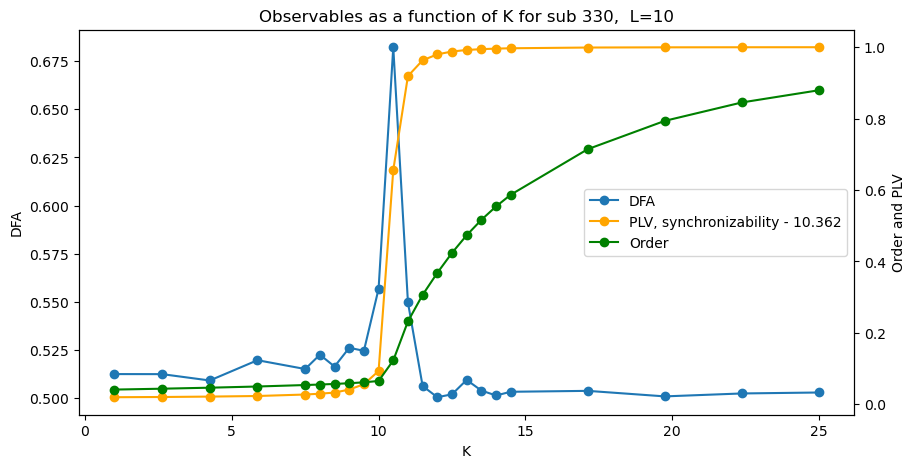

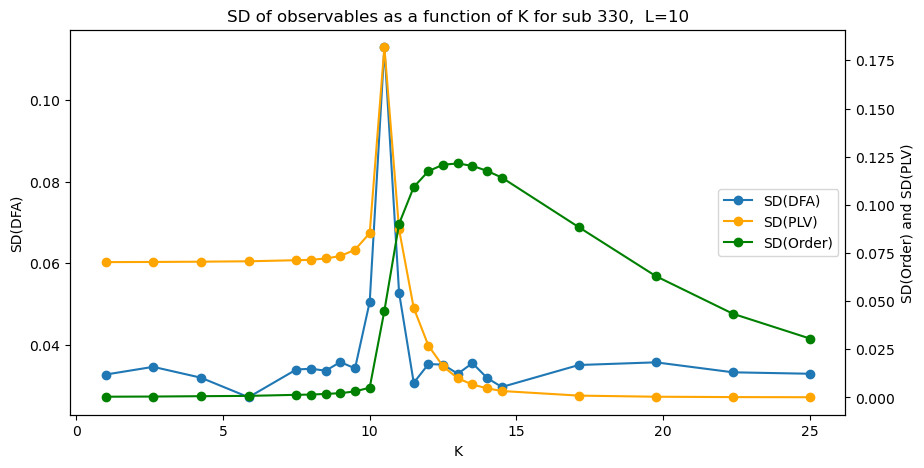

In [98]:
dfa_threshold = 0.55
dfa_fraction = np.where(DFA_KL_330_exp > dfa_threshold)[0]
dfa_first_index = dfa_fraction[0]
dfa_last_index = dfa_fraction[-1]
gp_width_dfa = k_values[dfa_last_index] - k_values[dfa_first_index]

plv_threshold = 0.08
plv_fraction = np.where(PLV_KL_330_exp_sd > plv_threshold)[0]
plv_first_index = plv_fraction[0]
plv_last_index = plv_fraction[0]
gp_width_plv = k_values[plv_last_index] - k_values[plv_first_index]

interp_plv = 0.5
interp_k_value = np.interp(interp_plv, PLV_KL_330_exp, k_values)

fig, ax1 = plt.subplots(figsize=(10,5))
L_val = 10
ax1.plot(k_values, DFA_KL_330_exp, '-o' , label=f'DFA')
ax1.set_xlabel('K')
ax1.set_ylabel('DFA')

ax2 = ax1.twinx()
ax2.plot(k_values, PLV_KL_330_exp, '-o', color='orange', label=f'PLV, synchronizability - {interp_k_value:.3f}')
ax2.plot(k_values, order_KL_330_exp, '-o', color='green', label='Order')
ax2.set_ylabel('Order and PLV')


lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2
ax1.legend(lines, labels, loc='center right')

ax1.set_title(f'Observables as a function of K for sub 330,  L={L_val}')
ax1.set_xlabel('K')
ax1.set_ylabel('DFA')
plt.show()

fig, ax1 = plt.subplots(figsize=(10,5))
L_val = 10
ax1.plot(k_values, DFA_KL_330_exp_sd, '-o' ,label='SD(DFA)')
ax1.set_xlabel('K')
ax1.set_ylabel('SD(DFA)')

ax2 = ax1.twinx()
ax2.plot(k_values, PLV_KL_330_exp_sd, '-o', color='orange', label=f'SD(PLV)')
ax2.plot(k_values, order_KL_330_exp_sd, '-o', color='green', label='SD(Order)')
ax2.set_ylabel('SD(Order) and SD(PLV)')


lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2
ax1.legend(lines, labels, loc='center right')

ax1.set_title(f'SD of observables as a function of K for sub 330,  L={L_val}')
ax1.set_xlabel('K')
ax1.set_ylabel('SD(DFA)')
plt.show()

In [ ]:
clinical_ids = np.load('clinical_ids.npy')

order_KL_86 = np.empty((86, 30, 30))
PLV_KL_86 = np.empty((86, 30, 30))
DFA_KL_86 = np.empty((86, 30, 30))
sd_KL_86 = np.empty((86, 30, 30))
for i, n in enumerate(clinical_ids):
    for k in range(1, 31):
        for l in range(1, 31):
            DFA_KL_86[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/exp_allsubs/sub-{n}/sub-{n}_K-{k}_L-{l}_dfa.npy"))
            PLV_KL_86[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/exp_allsubs/sub-{n}/sub-{n}_K-{k}_L-{l}_plv.npy"))
            order_KL_86[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/exp_allsubs/sub-{n}/sub-{n}_K-{k}_L-{l}_order.npy"))
            sd_KL_86[i, k-1, l-1] = np.mean(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/exp_allsubs/sub-{n}/sub-{n}_K-{k}_L-{l}_std.npy"))

sd_order_KL_86 = np.empty((86, 30, 30))
sd_PLV_KL_86 = np.empty((86, 30, 30))
sd_DFA_KL_86 = np.empty((86, 30, 30))
sd_sd_KL_86 = np.empty((86, 30, 30))
for i, n in enumerate(clinical_ids):
    for k in range(1, 31):
        for l in range(1, 31):
            sd_DFA_KL_86[i, k-1, l-1] = np.std(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/exp_allsubs/sub-{n}/sub-{n}_K-{k}_L-{l}_dfa.npy"))
            sd_PLV_KL_86[i, k-1, l-1] = np.std(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/exp_allsubs/sub-{n}/sub-{n}_K-{k}_L-{l}_plv.npy"))
            sd_order_KL_86[i, k-1, l-1] = np.std(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/exp_allsubs/sub-{n}/sub-{n}_K-{k}_L-{l}_order.npy"))
            sd_sd_KL_86[i, k-1, l-1] = np.std(np.load(f"/m/nbe/scratch/leap_mcpsych/Aleksi/exp_allsubs/sub-{n}/sub-{n}_K-{k}_L-{l}_std.npy"))

In [99]:
dfa_combined_array = np.load('/m/nbe/scratch/leap_mcpsych/Aleksi/exp_allsubs/dfa_combined_array.npy')
order_combined_array = np.load('/m/nbe/scratch/leap_mcpsych/Aleksi/exp_allsubs/order_combined_array.npy')
plv_combined_array = np.load('/m/nbe/scratch/leap_mcpsych/Aleksi/exp_allsubs/plv_combined_array.npy')
sdplv_combined_array = np.load('/m/nbe/scratch/leap_mcpsych/Aleksi/exp_allsubs/sdplv_combined_array.npy')

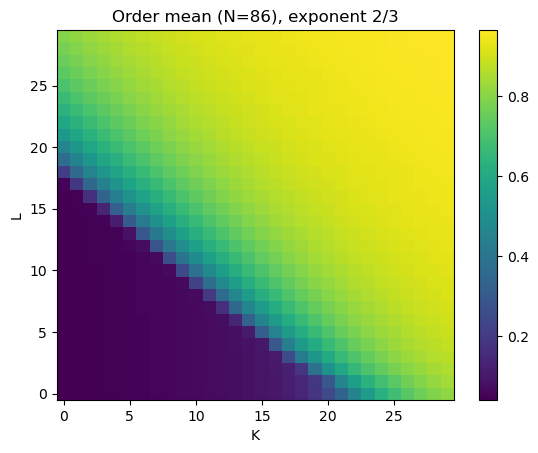

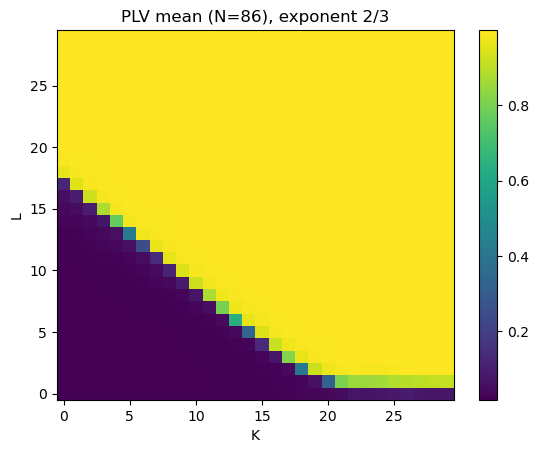

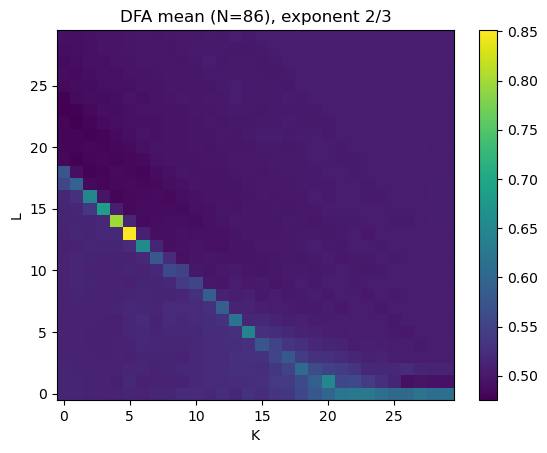

In [100]:
# Plot mean KL-sweeps for all subjects
im = plt.imshow(np.mean(order_combined_array, axis=0).T, origin='lower', aspect='auto')
plt.xlabel("K")
plt.ylabel("L")
plt.title("Order mean (N=86), exponent 2/3")
plt.colorbar(im)
plt.show()
plt.clf()

im = plt.imshow(plv_combined_array[1].T, origin='lower', aspect='auto')
plt.xlabel("K")
plt.ylabel("L")
plt.title("PLV mean (N=86), exponent 2/3")
plt.colorbar(im)
plt.show()

plt.clf()
im = plt.imshow(dfa_combined_array[1].T, origin='lower', aspect='auto')
plt.xlabel("K")
plt.ylabel("L")
plt.title("DFA mean (N=86), exponent 2/3")
plt.colorbar(im)
plt.show()


In [ ]:
# Load all connectomes
clinical_ids = np.load('clinical_ids.npy')
root_scs = np.empty((86,200,200))
for i, n in enumerate(clinical_ids):
    subject_path_all = f'/m/nbe/scratch/leap_mcpsych/Aleksi/connectomes/sub-CON{n}_yeo17_200Parcels_for_fit'
    all_subjects = pickle.load(open(subject_path_all, 'rb'))
    #connectomes[i,:,:] = all_subjects['connectome'] / np.mean(all_subjects['connectome'])
    root_scs[i,:,:] = all_subjects["connectome"]**(2/3)
    orig_scs = root_scs / root_scs.mean()
print(f'Connectomes shape - {orig_scs.shape}')
# Create a networkx object for each connectome (86 connectomes --> 86 networkx objects)
graphs = []
for subject in range(orig_scs.shape[0]):
    connectome = orig_scs[subject]
    G = nx.from_numpy_array(connectome)
    graphs.append(G)

In [38]:
clinical_ids = np.load('clinical_ids.npy')
root_scs = np.empty((73,200,200))
for i, n in enumerate(clinical_ids[:17]):
    subject_path_all = f'/m/nbe/scratch/leap_mcpsych/Aleksi/connectomes/sub-CON{n}_yeo17_200Parcels_for_fit'
    all_subjects = pickle.load(open(subject_path_all, 'rb'))
    root_scs[i, :, :] = all_subjects["connectome"] ** (2 / 3)

for i, n in enumerate(clinical_ids[30:]):
    subject_path_all = f'/m/nbe/scratch/leap_mcpsych/Aleksi/connectomes/sub-CON{n}_yeo17_200Parcels_for_fit'
    all_subjects = pickle.load(open(subject_path_all, 'rb'))
    root_scs[i + 17, :, :] = all_subjects["connectome"] ** (2 / 3)

orig_scs = root_scs / root_scs.mean()
print(f'Connectomes shape - {orig_scs.shape}')

graphs = []
for subject in range(orig_scs.shape[0]):
    connectome = orig_scs[subject]
    G = nx.from_numpy_array(connectome)
    graphs.append(G)

Connectomes shape - (73, 200, 200)


In [39]:
# Calculate several network metrics

# Average clustering coefficient
avg_clustering_coeffs = []
for graph in graphs:
    avg_clustering_coeffs.append(nx.average_clustering(graph))

# Modularity
modularities = []
for i, graph in enumerate(graphs):
     communities = community.greedy_modularity_communities(graph)
     modularity = community.modularity(graph, communities)
     modularities.append(modularity)

# Eigenvalues
eigenvalues = []
for graph in graphs:
    adjacency_matrix = nx.to_numpy_array(graph) 
    eigvals = np.linalg.eigvals(adjacency_matrix) 
    eigenvalues.append(eigvals)
eigenvalues = np.array(eigenvalues)
mean_eigvals = np.mean(eigenvalues, axis = 1)

# Eigenvector centrality
eigenvectors = []
for graph in graphs:
    eigenvector_centrality = nx.eigenvector_centrality(graph)
    eigenvectors.append(eigenvector_centrality)
eigenvectors = np.array(eigenvectors)
eigenvector_centrality = np.mean([list(subject.values()) for subject in eigenvectors], axis=1)

# Edge weight distribution
edge_weights = []
for graph in graphs:
    edge_attributes = nx.get_edge_attributes(graph, 'weight').values()
    mean_edge_weight = sum(edge_attributes) / len(edge_attributes)
    edge_weights.append(mean_edge_weight)

# Assortativity
assortativity = []
for graph in graphs:
    assortativity_coef = nx.degree_assortativity_coefficient(graph)
    assortativity.append(assortativity_coef)
assortativity = np.array(assortativity)

# Average shortest path length 
path_length = []
for graph in graphs:
    ave_length = nx.average_shortest_path_length(graph)
    path_length.append(ave_length)

# Node degree centrality 
degree_centrality = []
for graph in graphs:
    centra_coeff = nx.degree_centrality(graph)
    degree_centrality.append(centra_coeff)
degree_centrality_list = np.array(degree_centrality)
mean_node_degree_centrality = np.mean([list(subject.values()) for subject in degree_centrality_list], axis=1)

# Rich club coefficient
rich_club_coeffs_by_graph = []
for G in graphs:
    coeff_dict = nx.rich_club_coefficient(G, normalized=False)
    rich_club_coeffs_by_graph.append(coeff_dict)
average_rich_club_coeffs = []
for coeff_dict in rich_club_coeffs_by_graph:
    coefficients = np.array(list(coeff_dict.values()))
    average_coefficient = np.mean(coefficients)
    average_rich_club_coeffs.append(average_coefficient)
average_rich_club_coeffs = np.array(average_rich_club_coeffs)

In [57]:
# Calculate several criticality metrics

# GP-width for all subjects defined with order
threshold_min = 0.1
threshold_max = 0.3
gp_widths_order = []
for id in range(order_combined_array.shape[0]):
    num_pixels_in_order = np.sum((order_combined_array[id] >= threshold_min) & (order_combined_array[id] <= threshold_max))
    total_pixels_order = order_combined_array[id].size
    gp_width_fr_order = num_pixels_in_order / total_pixels_order
    gp_widths_order.append(gp_width_fr_order)

# GP-width for all subjects defined with DFA
threshold = 0.55
gp_widths_dfa = []
for id in range(dfa_combined_array.shape[0]):
    num_pixels_in_dfa = np.sum((dfa_combined_array[id] >= threshold))
    total_pixels_dfa = dfa_combined_array[id].size
    gp_width_fr_dfa = num_pixels_in_dfa / total_pixels_dfa
    gp_widths_dfa.append(gp_width_fr_dfa)

# GP-width for all subjects defined with SD(PLV)
sdplv_threshold = 0.08
gp_widths_sdplv = []
for id in range(sdplv_combined_array.shape[0]):
    num_pixels_in_sdplv = np.sum((sdplv_combined_array[id] >= sdplv_threshold))
    total_pixels_sdplv = sdplv_combined_array[id].size
    gp_width_fr_sdplv = num_pixels_in_sdplv / total_pixels_sdplv
    gp_widths_sdplv.append(gp_width_fr_sdplv)

# Critical DFA = maximum DFA for each K averaged
#max_dfa_per_k = np.max(dfa_combined_array, axis=(1, 2))
max_dfa_per_k = np.max(dfa_combined_array, axis=1)

# Synchronizability =  I fixed L to L = 10 and I plotted that row as a lineplot as a function of K to interpolate the
# K value where PLV equals PLV = 0.5
synchronizability = []
l = 10
interp_plv = 0.5
k_values = np.linspace(1,30,30)
for id in range(plv_combined_array.shape[0]):
    interp_k_value = np.interp(interp_plv, plv_combined_array[id,:,l], k_values)
    synchronizability.append(interp_k_value)

(9, 5)
[[ 0.12039397 -0.47291192 -0.04880371 -0.36300767  0.24554183]
 [-0.06887196  0.35343253  0.02548113  0.1473911  -0.23288719]
 [ 0.21995597  0.08931442 -0.12971814  0.09962188  0.13698453]
 [-0.11791241  0.43837322  0.04538751  0.41408893 -0.26909965]
 [-0.06011003 -0.1138203   0.03505569  0.07546008 -0.1301574 ]
 [ 0.11791241 -0.43837322 -0.04538751 -0.41408893  0.26909965]
 [ 0.09423407 -0.30474276 -0.0264108  -0.51799415  0.30333919]
 [ 0.24326348 -0.16835951 -0.22159438  0.1172     -0.0167528 ]
 [ 0.12389064 -0.46963733 -0.05001126 -0.35937716  0.24685412]]


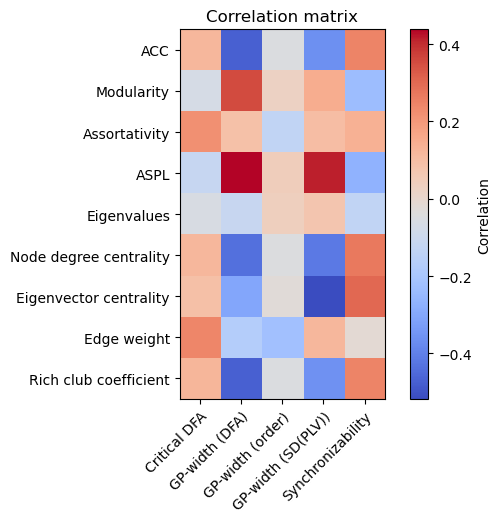

(9, 5)
[[3.10302010e-01 2.39028206e-05 6.81786457e-01 1.59717055e-03
  3.62713871e-02]
 [5.62606702e-01 2.16034049e-03 8.30556461e-01 2.13358290e-01
  4.73897261e-02]
 [6.15062668e-02 4.52390706e-01 2.74037301e-01 4.01712044e-01
  2.47823137e-01]
 [3.20453188e-01 1.04848743e-04 7.02984765e-01 2.70698445e-04
  2.13268410e-02]
 [6.13437159e-01 3.37651018e-01 7.68424078e-01 5.25748770e-01
  2.72401880e-01]
 [3.20453188e-01 1.04848743e-04 7.02984765e-01 2.70698445e-04
  2.13268410e-02]
 [4.27773922e-01 8.75553873e-03 8.24471187e-01 2.68496971e-06
  9.08665009e-03]
 [3.80946678e-02 1.54497857e-01 5.95484624e-02 3.23406211e-01
  8.88126429e-01]
 [2.96354999e-01 2.76905915e-05 6.74350706e-01 1.79290611e-03
  3.52546467e-02]]


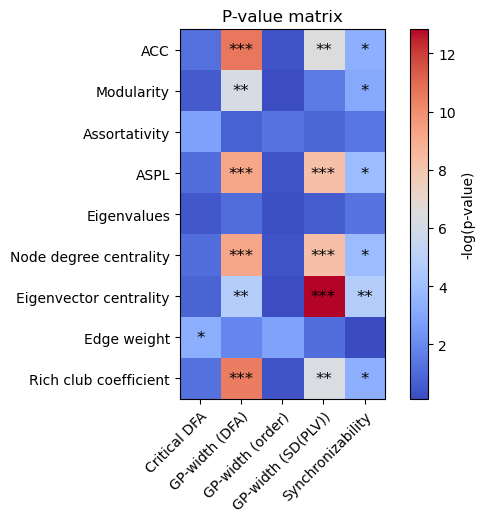

In [88]:
# Heatmap visualization

# Correlation matrix
criticality_metrics = np.array([[max_dfa_per_k], [gp_widths_dfa], [gp_widths_order], [gp_widths_sdplv], [synchronizability]])
network_metrics = np.array([[avg_clustering_coeffs], [modularities], [assortativity], [path_length], [mean_eigvals], [mean_node_degree_centrality], [eigenvector_centrality], [edge_weights], [average_rich_club_coeffs]])

# Remove the extra dimensions using np.squeeze
criticality_metrics = np.squeeze(criticality_metrics)
network_metrics = np.squeeze(network_metrics)

correlation_matrix = np.empty((network_metrics.shape[0], criticality_metrics.shape[0]))
p_value_matrix = np.empty((network_metrics.shape[0], criticality_metrics.shape[0]))

for i in range(network_metrics.shape[0]): 
    for j in range(criticality_metrics.shape[0]):  
        correlation_coefficient, p_value = stats.pearsonr(network_metrics[i], criticality_metrics[j])
        correlation_matrix[i, j] = correlation_coefficient
        p_value_matrix[i, j] = p_value
print(correlation_matrix.shape)
print(correlation_matrix)

fig, ax = plt.subplots()
im = ax.imshow(correlation_matrix, cmap='coolwarm', vmin = np.min(correlation_matrix), vmax = np.max(correlation_matrix))

ax.set_xticks(np.arange(criticality_metrics.shape[0]))
ax.set_yticks(np.arange(network_metrics.shape[0]))

ax.set_xticklabels(['Critical DFA', 'GP-width (DFA)', 'GP-width (order)','GP-width (SD(PLV))', 'Synchronizability'])
ax.set_yticklabels(['ACC', 'Modularity', 'Assortativity', 'ASPL', 'Eigenvalues', 'Node degree centrality', 'Eigenvector centrality', 'Edge weight', 'Rich club coefficient'])

plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

cbar = ax.figure.colorbar(im, ax=ax, label='Correlation')
ax.set_title('Correlation matrix')
plt.show()

# P-values
print(p_value_matrix.shape)
print(p_value_matrix)
fig, ax = plt.subplots()
im = ax.imshow(-np.log(p_value_matrix), cmap='coolwarm')
ax.set_xticks(np.arange(criticality_metrics.shape[0]))
ax.set_yticks(np.arange(network_metrics.shape[0]))

ax.set_xticklabels(['Critical DFA', 'GP-width (DFA)', 'GP-width (order)', 'GP-width (SD(PLV))', 'Synchronizability'])
ax.set_yticklabels(['ACC', 'Modularity', 'Assortativity', 'ASPL', 'Eigenvalues', 'Node degree centrality', 'Eigenvector centrality', 'Edge weight', 'Rich club coefficient'])
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

# Add significant markers based on log-scale p-values
for i in range(network_metrics.shape[0]):
    for j in range(criticality_metrics.shape[0]):
        p_value = p_value_matrix[i, j]
        if p_value < 0.001:
            ax.text(j, i, '***', ha='center', va='center', color='black', fontsize=12)
        elif p_value < 0.01:
            ax.text(j, i, '**', ha='center', va='center', color='black', fontsize=12)
        elif p_value < 0.05:
            ax.text(j, i, '*', ha='center', va='center', color='black', fontsize=12)

cbar = ax.figure.colorbar(im, ax=ax, label='-log(p-value)')

ax.set_title('P-value matrix')
plt.show()

In [ ]:
# BELOW STARTS CODES WITH MEAN NORMALIZED CONNECTOMES

In [12]:
# Load metrics for all subjects (mean, N=86)
DFA_KL_86 = np.load("/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/KL_sweep_data/DFA_KL.npy")
PLV_KL_86 = np.load("/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/KL_sweep_data/PLV_KL.npy")
sd_KL_86 = np.load("/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/KL_sweep_data/sd_KL.npy")
order_KL_86 = np.load("/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/KL_sweep_data/order_KL.npy")

In [43]:
DFA_KL_86_sd = np.load("/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/KL_sweep_data/DFA_KL_86_sd.npy")
PLV_KL_86_sd = np.load("/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/KL_sweep_data/PLV_KL_86_sd.npy")
sd_KL_86_sd = np.load("/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/KL_sweep_data/sd_KL_86_sd.npy")
order_KL_86_sd = np.load("/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/KL_sweep_data/order_KL_86_sd.npy")

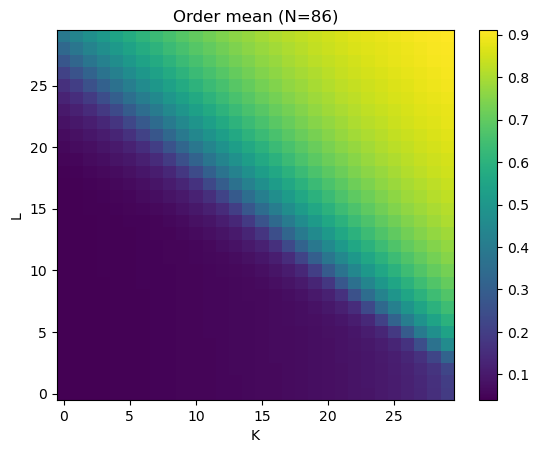

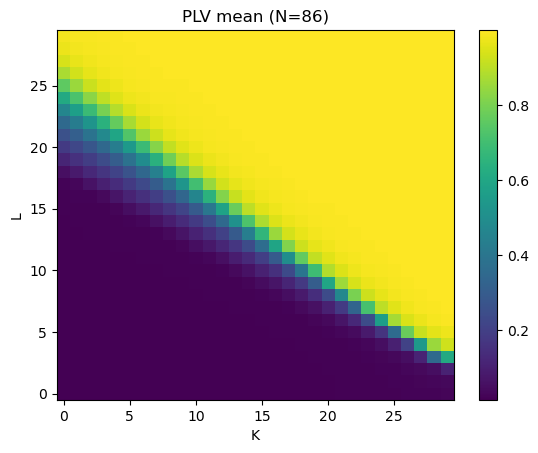

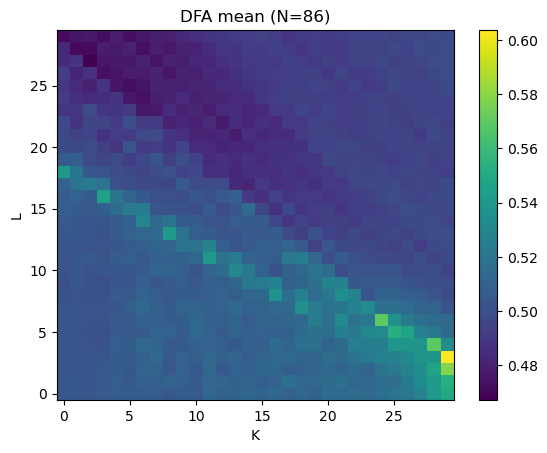

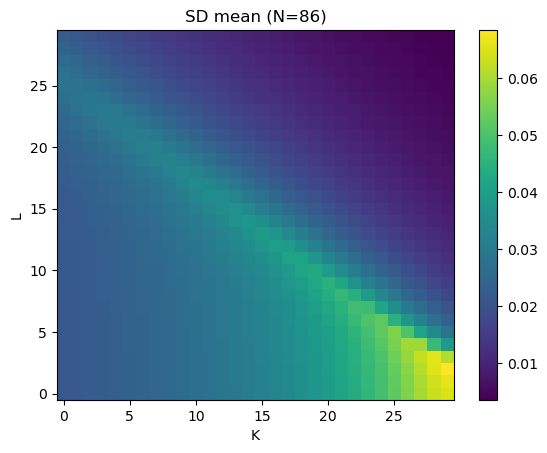

In [48]:
# Plot mean KL-sweeps for all subjects
im = plt.imshow(np.mean(order_KL_86, axis=0).T, origin='lower', aspect='auto')
plt.xlabel("K")
plt.ylabel("L")
plt.title("Order mean (N=86)")
plt.colorbar(im)
plt.show()
plt.clf()

im = plt.imshow(PLV_KL_86[1].T, origin='lower', aspect='auto')
plt.xlabel("K")
plt.ylabel("L")
plt.title("PLV mean (N=86)")
plt.colorbar(im)
plt.show()

plt.clf()
im = plt.imshow(DFA_KL_86[1].T, origin='lower', aspect='auto')
plt.xlabel("K")
plt.ylabel("L")
plt.title("DFA mean (N=86)")
plt.colorbar(im)
plt.show()

plt.clf()
im = plt.imshow(np.mean(sd_KL_86, axis=0).T, origin='lower', aspect='auto')
plt.xlabel("K")
plt.ylabel("L")
plt.title("SD mean (N=86)")
plt.colorbar(im)
plt.show()

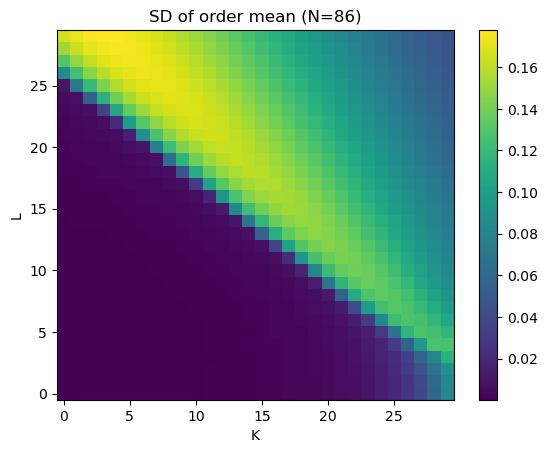

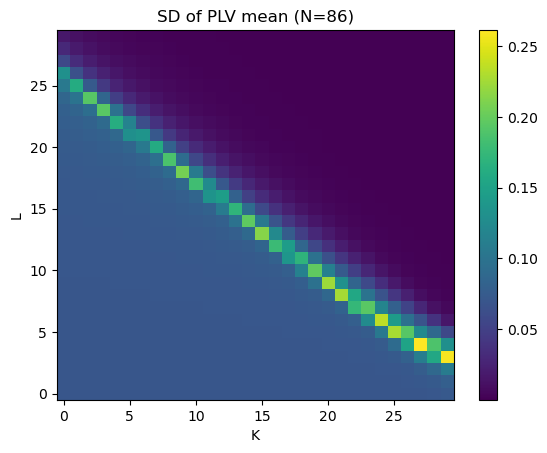

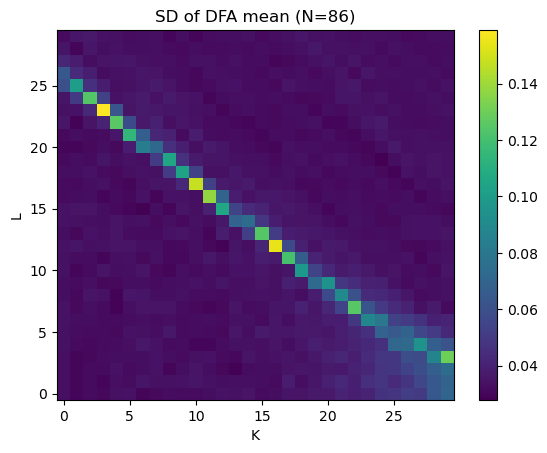

In [49]:
# Plot SD mean KL-sweeps for all subjects
im = plt.imshow(np.mean(order_KL_86_sd, axis=0).T, origin='lower', aspect='auto')
plt.xlabel("K")
plt.ylabel("L")
plt.title("SD of order mean (N=86)")
plt.colorbar(im)
plt.show()
plt.clf()

im = plt.imshow(PLV_KL_86_sd[1].T, origin='lower', aspect='auto')
plt.xlabel("K")
plt.ylabel("L")
plt.title("SD of PLV mean (N=86)")
plt.colorbar(im)
plt.show()

plt.clf()
im = plt.imshow(DFA_KL_86_sd[1].T, origin='lower', aspect='auto')
plt.xlabel("K")
plt.ylabel("L")
plt.title("SD of DFA mean (N=86)")
plt.colorbar(im)
plt.show()

In [99]:
# Print interesting stuff
print(f'The most critical point in DFA for all subjects - {np.unravel_index(DFA_KL_86[1].argmax(), DFA_KL_86[1].shape)}')
print(f'The value of the most critical point - {np.amax(DFA_KL_86[1])}')
critical_ridge = np.argwhere(DFA_KL_86[1]>0.55)
print(f'Number of KL-pairs in critical ridge in DFA - {critical_ridge.shape[0]}')
flattened = np.ndarray.flatten(DFA_KL_86[1])
sorted = np.sort(flattened[::-1])
top_5_exponents = sorted[-45:]
mean_top_5 = np.mean(top_5_exponents)
print(f'Mean DFA scaling exponent of the top 5 percent of exponents - {mean_top_5}')

The most critical point in DFA for all subjects - (29, 3)
The value of the most critical point - 0.6036430543996435
Number of KL-pairs in critical ridge in DFA - 6
Mean DFA scaling exponent of the top 5 percent of exponents - 0.539546598080566


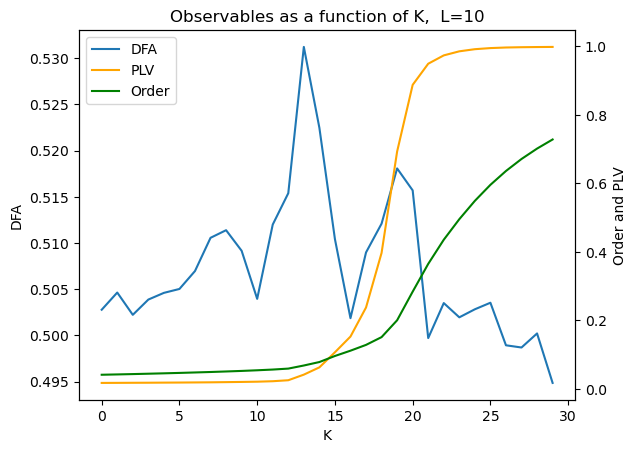

In [100]:
# Plot observables as a function of L to observe them better
fig, ax1 = plt.subplots()
L_val = 10 # adjust if want
ax1.plot(DFA_KL_86[1][:, L_val], label='DFA')
ax1.set_xlabel('K')
ax1.set_ylabel('DFA')

ax2 = ax1.twinx()
ax2.plot(PLV_KL_86[1][:, L_val], color='orange', label='PLV')
ax2.plot(order_KL_86[1][:, L_val], color='green', label='Order')
ax2.set_ylabel('Order and PLV')


lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2
ax1.legend(lines, labels, loc='upper left')

ax1.set_title(f'Observables as a function of K,  L={L_val}')
ax1.set_xlabel('K')
ax1.set_ylabel('DFA')
plt.show()

In [6]:
# Take one subject for visualization purpose
DFA_KL_330 = np.load("/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/KL_sweep_data/DFA_KL_330.npy")
PLV_KL_330 = np.load("/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/KL_sweep_data/PLV_KL_330.npy")
sd_KL_330 = np.load("/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/KL_sweep_data/sd_KL_330.npy")
order_KL_330 = np.load("/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/KL_sweep_data/order_KL_330.npy")

In [7]:
# Optional subjects!
DFA_KL_114 = np.load("/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/KL_sweep_data/DFA_KL_114.npy")
PLV_KL_114 = np.load("/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/KL_sweep_data/PLV_KL_114.npy")
sd_KL_114 = np.load("/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/KL_sweep_data/sd_KL_114.npy")
order_KL_114 = np.load("/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/KL_sweep_data/order_KL_114.npy")

DFA_KL_236 = np.load("/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/KL_sweep_data/DFA_KL_236.npy")
PLV_KL_236 = np.load("/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/KL_sweep_data/PLV_KL_236.npy")
sd_KL_236 = np.load("/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/KL_sweep_data/sd_KL_236.npy")
order_KL_236 = np.load("/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/KL_sweep_data/order_KL_236.npy")

In [91]:
DFA_KL_330_sd = np.load("/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/KL_sweep_data/DFA_KL_330_sd.npy")
PLV_KL_330_sd = np.load("/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/KL_sweep_data/PLV_KL_330_sd.npy")
sd_KL_330_sd = np.load("/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/KL_sweep_data/sd_KL_330_sd.npy")
order_KL_330_sd = np.load("/m/nbe/scratch/leap_mcpsych/Aleksi/all_subjects/KL_sweep_data/order_KL_330_sd.npy")

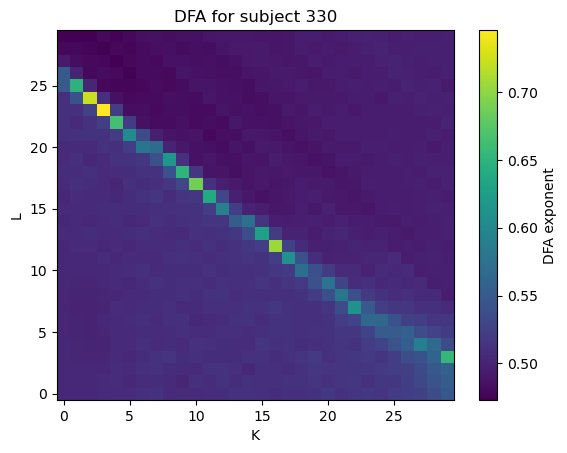

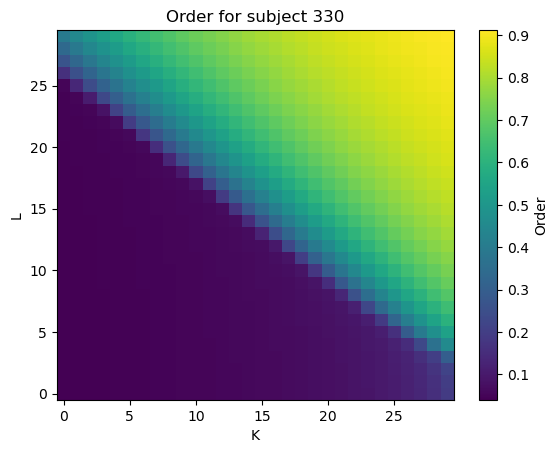

In [92]:
# Plot subject DFA and order i.e. KL-sweeps
im = plt.imshow(DFA_KL_330[1].T, origin = 'lower', aspect = 'auto')
plt.xlabel("K")
plt.ylabel("L")
plt.title("DFA for subject 330")
plt.colorbar(im, label = 'DFA exponent')
plt.show()

im = plt.imshow(np.mean(order_KL_330, axis=0).T, origin='lower', aspect='auto')
plt.xlabel("K")
plt.ylabel("L")
plt.title("Order for subject 330")
plt.colorbar(im, label = 'Order')
plt.show()

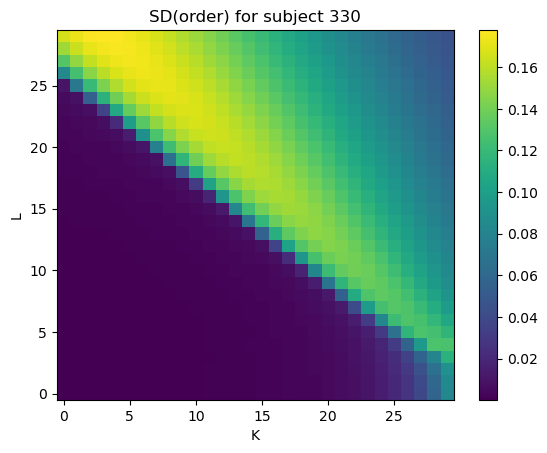

/tmp/ipykernel_5265/2432925745.py:11: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(threshold_mask, linewidth=0.2, colors='red', alpha = 0.5)


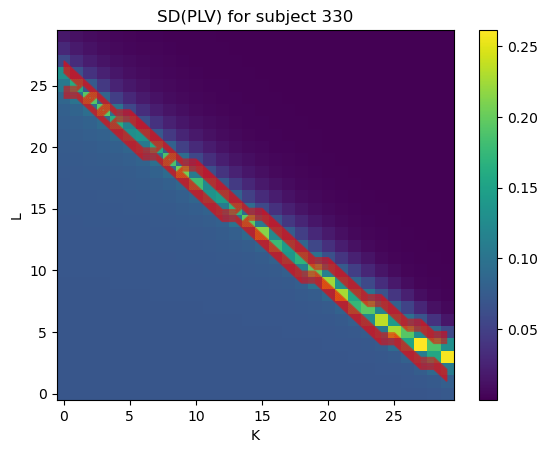

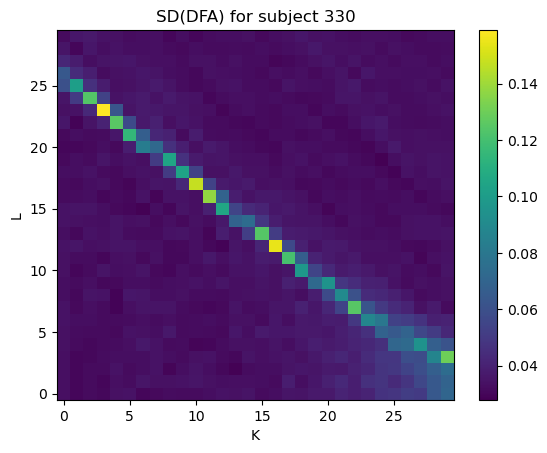

In [93]:
im = plt.imshow(np.mean(order_KL_330_sd, axis=0).T, origin='lower', aspect='auto')
plt.xlabel("K")
plt.ylabel("L")
plt.title("SD(order) for subject 330")
plt.colorbar(im)
plt.show()
plt.clf()

threshold_mask = PLV_KL_330_sd[1].T > 0.10
im = plt.imshow(PLV_KL_330_sd[1].T, origin='lower', aspect='auto')
plt.contour(threshold_mask, linewidth=0.2, colors='red', alpha = 0.5)
plt.xlabel("K")
plt.ylabel("L")
plt.title("SD(PLV) for subject 330")
plt.colorbar(im)
plt.show()

plt.clf()
im = plt.imshow(DFA_KL_330_sd[1].T, origin='lower', aspect='auto')
plt.xlabel("K")
plt.ylabel("L")
plt.title("SD(DFA) for subject 330")
plt.colorbar(im)
plt.show()

In [9]:
# Print interesting stuff from KL-sweep
print(f'The most critical point in DFA for subject 330 - {np.unravel_index(DFA_KL_330[1].argmax(), DFA_KL_330[1].shape)}')
print(f'The value of the most critical point - {np.amax(DFA_KL_330[1])}')
critical_ridge330 = np.argwhere(DFA_KL_330[1]>0.55)
print(f'Number of KL-pairs in critical ridge in DFA - {critical_ridge330.shape[0]}')
flattened330 = np.ndarray.flatten(DFA_KL_330[1])
sorted330 = np.sort(flattened330[::-1])
top_5_exponents330 = sorted330[-45:]
mean_top_5_330 = np.mean(top_5_exponents330)
print(f'Mean DFA scaling exponent of the top 5 percent of exponents - {mean_top_5_330}')

The most critical point in DFA for subject 330 - (3, 23)
The value of the most critical point - 0.7455905608583154
Number of KL-pairs in critical ridge in DFA - 34
Mean DFA scaling exponent of the top 5 percent of exponents - 0.5888729376744058


GP widths for subjects [114, 236, 330] (L = 15) are [8.336966078487825, 9.13848235726283, 8.591070471026915]


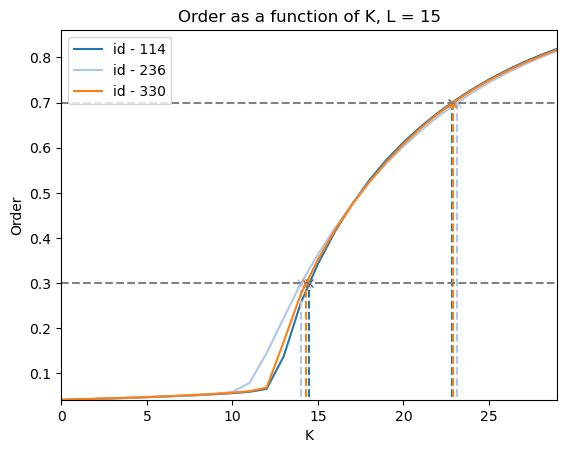

In [10]:
# First aspect to operationalize GP-width (done for all subs also in analysis.ipynb)
L_val = 15
sub_list = [114, 236, 330]
order_subs = [order_KL_114[1][:, L_val], order_KL_236[1][:, L_val], order_KL_330[1][:, L_val]]
# Constant over subjects, define once
k_values = np.arange(0, 30)

ord_min = 0.3
ord_max = 0.7

# Any cmap goes, it's needed to match plot colors
cmap = plt.colormaps["tab20"](np.arange(0, len(order_subs)))
# Find function K(Order) !!
interpolated = [sc.interpolate.interp1d(order, k_values) for order in order_subs]
ynew = [ord_min, ord_max]

fig, ax = plt.subplots()
for i, interpol in enumerate(interpolated):
    ax.plot(interpol(ynew), ynew, 'x', color=cmap[i])
    ax.vlines(x=interpol(ynew), ymin=0, ymax=ynew, color=cmap[i], linestyle='--')
    ax.plot(k_values, order_subs[i], color=cmap[i], label=f'id - {sub_list[i]}')
    
# Order limits
ax.hlines(y=ynew, xmin=min(k_values), xmax=max(k_values), color='grey', linestyle='--')

# Limits to make things look nice
ax.set_ylim(min(order_subs[i]))
ax.set_xlim(0, max(k_values))
ax.set_xlabel('K')
ax.set_ylabel('Order')
ax.set_title(f'Order as a function of K, L = {L_val}')
ax.legend()
# Compute GP widths for each dataset
gp_widths = [interpol(ynew[1])-interpol(ynew[0]) for interpol in interpolated]

print(f'GP widths for subjects {sub_list} (L = {L_val}) are', gp_widths)

Area under the fitted regression line for Subject 330: 0.4355846670565921


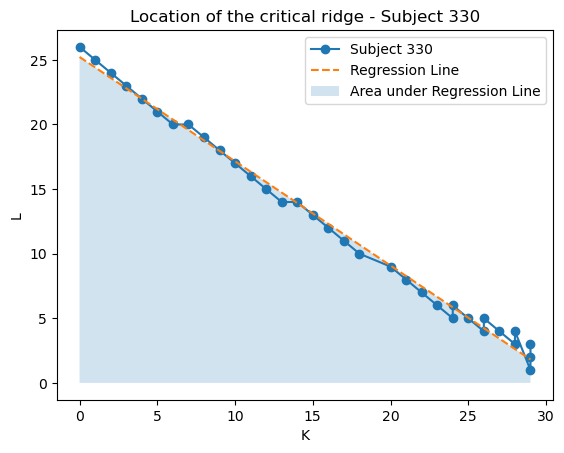

In [12]:
K_330 = critical_ridge330[:, 0]
L_330 = critical_ridge330[:, 1]

# Fit the regression line
regression_coeffs_330 = np.polyfit(K_330, L_330, 1)
regression_line = np.poly1d(regression_coeffs_330)

# Calculate the area under the fitted regression line
num_points_for_integration = 1000  # Number of points for integration
K_integration = np.linspace(np.min(K_330), np.max(K_330), num_points_for_integration)
L_regression = regression_line(K_integration)
area_under_regression = simps(L_regression, K_integration)

print(f"Area under the fitted regression line for Subject 330: {area_under_regression / DFA_KL_330[1].size}")

# Plot the critical ridge and the fitted regression line
plt.figure()
plt.plot(K_330, L_330, 'o-', label='Subject 330')
plt.plot(K_330, np.polyval(regression_coeffs_330, K_330), '--', label='Regression Line')
plt.fill_between(K_integration, L_regression, alpha=0.2, label='Area under Regression Line')
plt.xlabel('K')
plt.ylabel('L')
plt.title('Location of the critical ridge - Subject 330')
plt.legend()
plt.show()


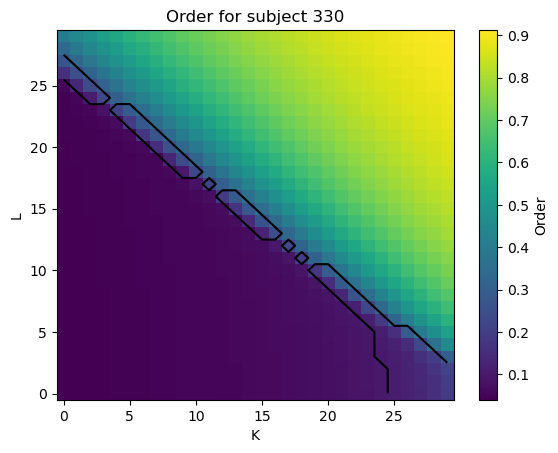

GP-width as a fraction of pixels for sub 330 - 0.07444444444444444


In [13]:
# GP-width defined in 2D order plot
# Count the number of pixels with order values within the range
threshold_min = 0.1
threshold_max = 0.3

num_pixels_in_range = np.sum((np.mean(order_KL_330, axis=0).T >= threshold_min) & (np.mean(order_KL_330, axis=0).T <= threshold_max))
total_pixels = np.mean(order_KL_330, axis=0).T.size
criticality_in_range_330 = num_pixels_in_range / total_pixels

im = plt.imshow(np.mean(order_KL_330, axis=0).T, origin='lower', aspect='auto')
contours = (np.mean(order_KL_330, axis=0).T >= threshold_min) & (np.mean(order_KL_330, axis=0).T <= threshold_max)
plt.contour(contours, levels=[0.5], colors='black', linewidths=1.5)
plt.xlabel("K")
plt.ylabel("L")
plt.title("Order for subject 330")
plt.colorbar(im, label = 'Order')
plt.show()
print(f'GP-width as a fraction of pixels for sub 330 - {criticality_in_range_330}')

In [14]:
# Same as above but with DFA
threshold = 0.55

num_pixels_in_range = np.sum((DFA_KL_330[1].T >= threshold))
total_pixels = DFA_KL_330[1].T.size
criticality_in_range_330 = num_pixels_in_range / total_pixels
print(f'GP-width as a fraction of pixels for sub 330 - {criticality_in_range_330}')

GP-width as a fraction of pixels for sub 330 - 0.03777777777777778


In [30]:
# Load all connectomes
clinical_ids = np.load('clinical_ids.npy')
connectomes = np.empty((86,200,200))
for i, n in enumerate(clinical_ids):
    subject_path_all = f'/m/nbe/scratch/leap_mcpsych/Aleksi/connectomes/sub-CON{n}_yeo17_200Parcels_for_fit'
    all_subjects = pickle.load(open(subject_path_all, 'rb'))
    connectomes[i,:,:] = all_subjects['connectome'] / np.mean(all_subjects['connectome'])
print(f'Connectomes shape - {connectomes.shape}')

Connectomes shape - (86, 200, 200)


In [31]:
# Create a networkx object for each connectome (86 connectomes --> 86 networkx objects)
graphs = []
for subject in range(connectomes.shape[0]):
    connectome = connectomes[subject]
    G = nx.from_numpy_array(connectome)
    graphs.append(G)

In [35]:
# Calculate several network metrics

# Average clustering coefficient
avg_clustering_coeffs = []
for graph in graphs:
    avg_clustering_coeffs.append(nx.average_clustering(graph))

# Modularity
modularities = []
for i, graph in enumerate(graphs):
     communities = community.greedy_modularity_communities(graph)
     modularity = community.modularity(graph, communities)
     modularities.append(modularity)

# Eigenvalues
eigenvalues = []
for graph in graphs:
    adjacency_matrix = nx.to_numpy_array(graph) 
    eigvals = np.linalg.eigvals(adjacency_matrix) 
    eigenvalues.append(eigvals)
eigenvalues = np.array(eigenvalues)
mean_eigvals = np.mean(eigenvalues, axis = 1)

# Eigenvector centrality
eigenvectors = []
for graph in graphs:
    eigenvector_centrality = nx.eigenvector_centrality(graph)
    eigenvectors.append(eigenvector_centrality)
eigenvectors = np.array(eigenvectors)
eigenvector_centrality = np.mean([list(subject.values()) for subject in eigenvectors], axis=1)

# Edge weight distribution
edge_weights = []
for graph in graphs:
    edge_attributes = nx.get_edge_attributes(graph, 'weight').values()
    mean_edge_weight = sum(edge_attributes) / len(edge_attributes)
    edge_weights.append(mean_edge_weight)

# Assortativity
assortativity = []
for graph in graphs:
    assortativity_coef = nx.degree_assortativity_coefficient(graph)
    assortativity.append(assortativity_coef)
assortativity = np.array(assortativity)

# Average shortest path length 
path_length = []
for graph in graphs:
    ave_length = nx.average_shortest_path_length(graph)
    path_length.append(ave_length)

# Node degree centrality 
degree_centrality = []
for graph in graphs:
    centra_coeff = nx.degree_centrality(graph)
    degree_centrality.append(centra_coeff)
degree_centrality_list = np.array(degree_centrality)
mean_node_degree_centrality = np.mean([list(subject.values()) for subject in degree_centrality_list], axis=1)

# Rich club coefficient
rich_club_coeffs_by_graph = []
for G in graphs:
    coeff_dict = nx.rich_club_coefficient(G, normalized=False)
    rich_club_coeffs_by_graph.append(coeff_dict)
average_rich_club_coeffs = []
for coeff_dict in rich_club_coeffs_by_graph:
    coefficients = np.array(list(coeff_dict.values()))
    average_coefficient = np.mean(coefficients)
    average_rich_club_coeffs.append(average_coefficient)
average_rich_club_coeffs = np.array(average_rich_club_coeffs)

In [96]:
# Calculate several criticality metrics

# GP-width for all subjects defined with order
threshold_min = 0.1
threshold_max = 0.3
gp_widths_order = []
for id in range(order_KL_86.shape[0]):
    num_pixels_in_order = np.sum((order_KL_86[id] >= threshold_min) & (order_KL_86[id] <= threshold_max))
    total_pixels_order = order_KL_86[id].size
    gp_width_fr_order = num_pixels_in_order / total_pixels_order
    gp_widths_order.append(gp_width_fr_order)

# GP-width for all subjects defined with DFA
threshold = 0.55
gp_widths_dfa = []
for id in range(DFA_KL_86.shape[0]):
    num_pixels_in_dfa = np.sum((DFA_KL_86[id] >= threshold))
    total_pixels_dfa = DFA_KL_86[id].size
    gp_width_fr_dfa = num_pixels_in_dfa / total_pixels_dfa
    gp_widths_dfa.append(gp_width_fr_dfa)

# Critical DFA = maximum DFA for each K averaged
max_dfa_per_k = np.max(DFA_KL_86, axis=(1, 2))

# Synchronizability = location of the critical ridge (GP triangle area)
areas_under_regression = []
biases = []
for i in range(DFA_KL_86.shape[0]):
    critical_ridge = np.argwhere(DFA_KL_86[i] > 0.55)
    K = critical_ridge[:, 0]
    L = critical_ridge[:, 1]
    K[np.isnan(K)] = 0
    L[np.isnan(L)] = 0

    if len(K) < 2:
        continue
    
    regression_coeffs = np.polyfit(K, L, 1)
    biases.append(regression_coeffs[1])
    regression_line = np.poly1d(regression_coeffs)

    num_points_for_integration = 1000
    K_integration = np.linspace(np.min(K), np.max(K), num_points_for_integration)
    L_regression = regression_line(K_integration)
    area_under_regression = simps(L_regression, K_integration)
    
    areas_under_regression.append(area_under_regression / DFA_KL_86[1].size)
areas_under_regression = np.array(areas_under_regression)
areas_under_regression[20] = 0.001
areas_under_regression = np.array(areas_under_regression)

/m/nbe/scratch/leap_mcpsych/Aleksi/kuramoto_env2/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/m/nbe/scratch/leap_mcpsych/Aleksi/kuramoto_env2/lib/python3.10/site-packages/scipy/integrate/_quadrature.py:414: RuntimeWarning: invalid value encountered in true_divide
  h0divh1 = h0 / h1
/m/nbe/scratch/leap_mcpsych/Aleksi/kuramoto_env2/lib/python3.10/site-packages/scipy/integrate/_quadrature.py:416: RuntimeWarning: invalid value encountered in true_divide
  y[slice1] * (hsum * hsum / hprod) +


(9, 4)
[[-0.4124042  -0.28595879  0.1672629   0.01133313]
 [ 0.2504942   0.13654448 -0.05914163 -0.17898712]
 [ 0.26773457  0.31214511 -0.36301918  0.24599618]
 [ 0.42332486  0.32454958 -0.19104346  0.03047284]
 [-0.03210451 -0.02284157  0.01527894 -0.14645796]
 [-0.42332486 -0.32454958  0.19104346 -0.03047284]
 [-0.42295632 -0.41151804  0.24743461 -0.14005879]
 [ 0.42674152  0.33977881 -0.1966107   0.04235879]
 [-0.40531456 -0.27755916  0.16105164  0.01521103]]


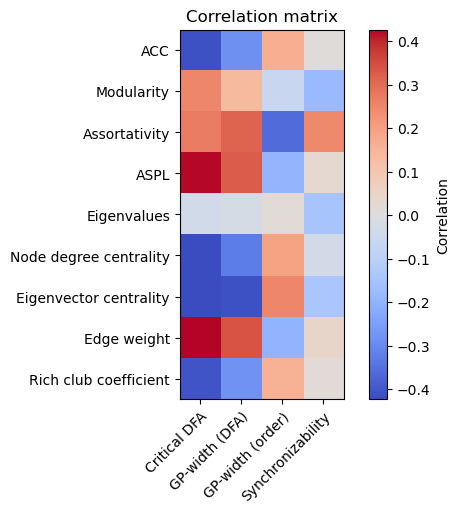

(9, 4)
[[7.95896030e-05 7.60665589e-03 1.23730978e-01 9.17514984e-01]
 [2.00071402e-02 2.09982670e-01 5.88572964e-01 9.91651959e-02]
 [1.26949458e-02 3.43531708e-03 5.92077853e-04 2.24246315e-02]
 [4.88673769e-05 2.29844315e-03 7.80681112e-02 7.80610912e-01]
 [7.69182819e-01 8.34642176e-01 8.88955670e-01 1.78435075e-01]
 [4.88673769e-05 2.29844315e-03 7.80681112e-02 7.80610912e-01]
 [4.96920963e-05 8.27424580e-05 2.16257687e-02 1.98374727e-01]
 [4.18055221e-05 1.37111886e-03 6.96214935e-02 6.98574825e-01]
 [1.08274639e-04 9.67135730e-03 1.38509241e-01 8.89446064e-01]]


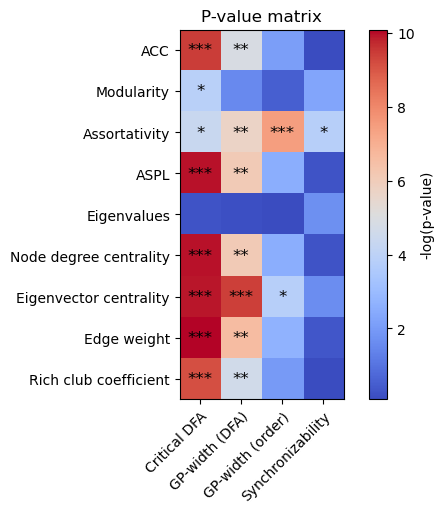

In [104]:
# Heatmap visualization

# Correlation matrix
criticality_metrics = np.array([[max_dfa_per_k], [gp_widths_dfa], [gp_widths_order], [areas_under_regression]])
network_metrics = np.array([[avg_clustering_coeffs], [modularities], [assortativity], [path_length], [mean_eigvals], [mean_node_degree_centrality], [eigenvector_centrality], [edge_weights], [average_rich_club_coeffs]])

# Remove the extra dimensions using np.squeeze
criticality_metrics = np.squeeze(criticality_metrics)
network_metrics = np.squeeze(network_metrics)

correlation_matrix = np.empty((network_metrics.shape[0], criticality_metrics.shape[0]))
p_value_matrix = np.empty((network_metrics.shape[0], criticality_metrics.shape[0]))

for i in range(network_metrics.shape[0]): 
    for j in range(criticality_metrics.shape[0]):  
        correlation_coefficient, p_value = stats.pearsonr(network_metrics[i], criticality_metrics[j])
        correlation_matrix[i, j] = correlation_coefficient
        p_value_matrix[i, j] = p_value
print(correlation_matrix.shape)
print(correlation_matrix)

fig, ax = plt.subplots()
im = ax.imshow(correlation_matrix, cmap='coolwarm', vmin = np.min(correlation_matrix), vmax = np.max(correlation_matrix))

ax.set_xticks(np.arange(criticality_metrics.shape[0]))
ax.set_yticks(np.arange(network_metrics.shape[0]))

ax.set_xticklabels(['Critical DFA', 'GP-width (DFA)', 'GP-width (order)', 'Synchronizability'])
ax.set_yticklabels(['ACC', 'Modularity', 'Assortativity', 'ASPL', 'Eigenvalues', 'Node degree centrality', 'Eigenvector centrality', 'Edge weight', 'Rich club coefficient'])

plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

cbar = ax.figure.colorbar(im, ax=ax, label='Correlation')
ax.set_title('Correlation matrix')
plt.show()

# P-values
print(p_value_matrix.shape)
print(p_value_matrix)
fig, ax = plt.subplots()
im = ax.imshow(-np.log(p_value_matrix), cmap='coolwarm')
ax.set_xticks(np.arange(criticality_metrics.shape[0]))
ax.set_yticks(np.arange(network_metrics.shape[0]))

ax.set_xticklabels(['Critical DFA', 'GP-width (DFA)', 'GP-width (order)', 'Synchronizability'])
ax.set_yticklabels(['ACC', 'Modularity', 'Assortativity', 'ASPL', 'Eigenvalues', 'Node degree centrality', 'Eigenvector centrality', 'Edge weight', 'Rich club coefficient'])
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

# Add significant markers based on log-scale p-values
for i in range(network_metrics.shape[0]):
    for j in range(criticality_metrics.shape[0]):
        p_value = p_value_matrix[i, j]
        if p_value < 0.001:
            ax.text(j, i, '***', ha='center', va='center', color='black', fontsize=12)
        elif p_value < 0.01:
            ax.text(j, i, '**', ha='center', va='center', color='black', fontsize=12)
        elif p_value < 0.05:
            ax.text(j, i, '*', ha='center', va='center', color='black', fontsize=12)

cbar = ax.figure.colorbar(im, ax=ax, label='-log(p-value)')

ax.set_title('P-value matrix')
plt.show()